In [1]:
# Import all the necessary packages
import numpy as np
import nibabel as nib                                                     # Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

## Load data and inspect data dimensions

In [2]:
# Define the image path and load the data
image_path = "./data/images/BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [3]:
# Extract data as numpy ndarray
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [4]:
image_data.shape

(240, 240, 155, 4)

In [5]:
# Get the image shape and print it out
height, width, depth, channels = image_data.shape
print(f"The image object has the following dimensions: height: {height}, width:{width}, depth:{depth}, channels:{channels}")

The image object has the following dimensions: height: 240, width:240, depth:155, channels:4


## Plot random image slices - execute same cell multiple times

Plotting Layer 56 Channel 3 of Image


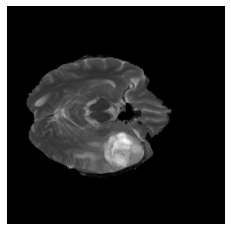

In [21]:
# Select random layer number
maxval = 154
i = np.random.randint(0, maxval)
# Define a channel to look at
channel = 3
print(f"Plotting Layer {i} Channel {channel} of Image")
plt.imshow(image_data[:, :, i, channel], cmap='gray')
plt.axis('off');

## Plot image slices - increasing layer numbers

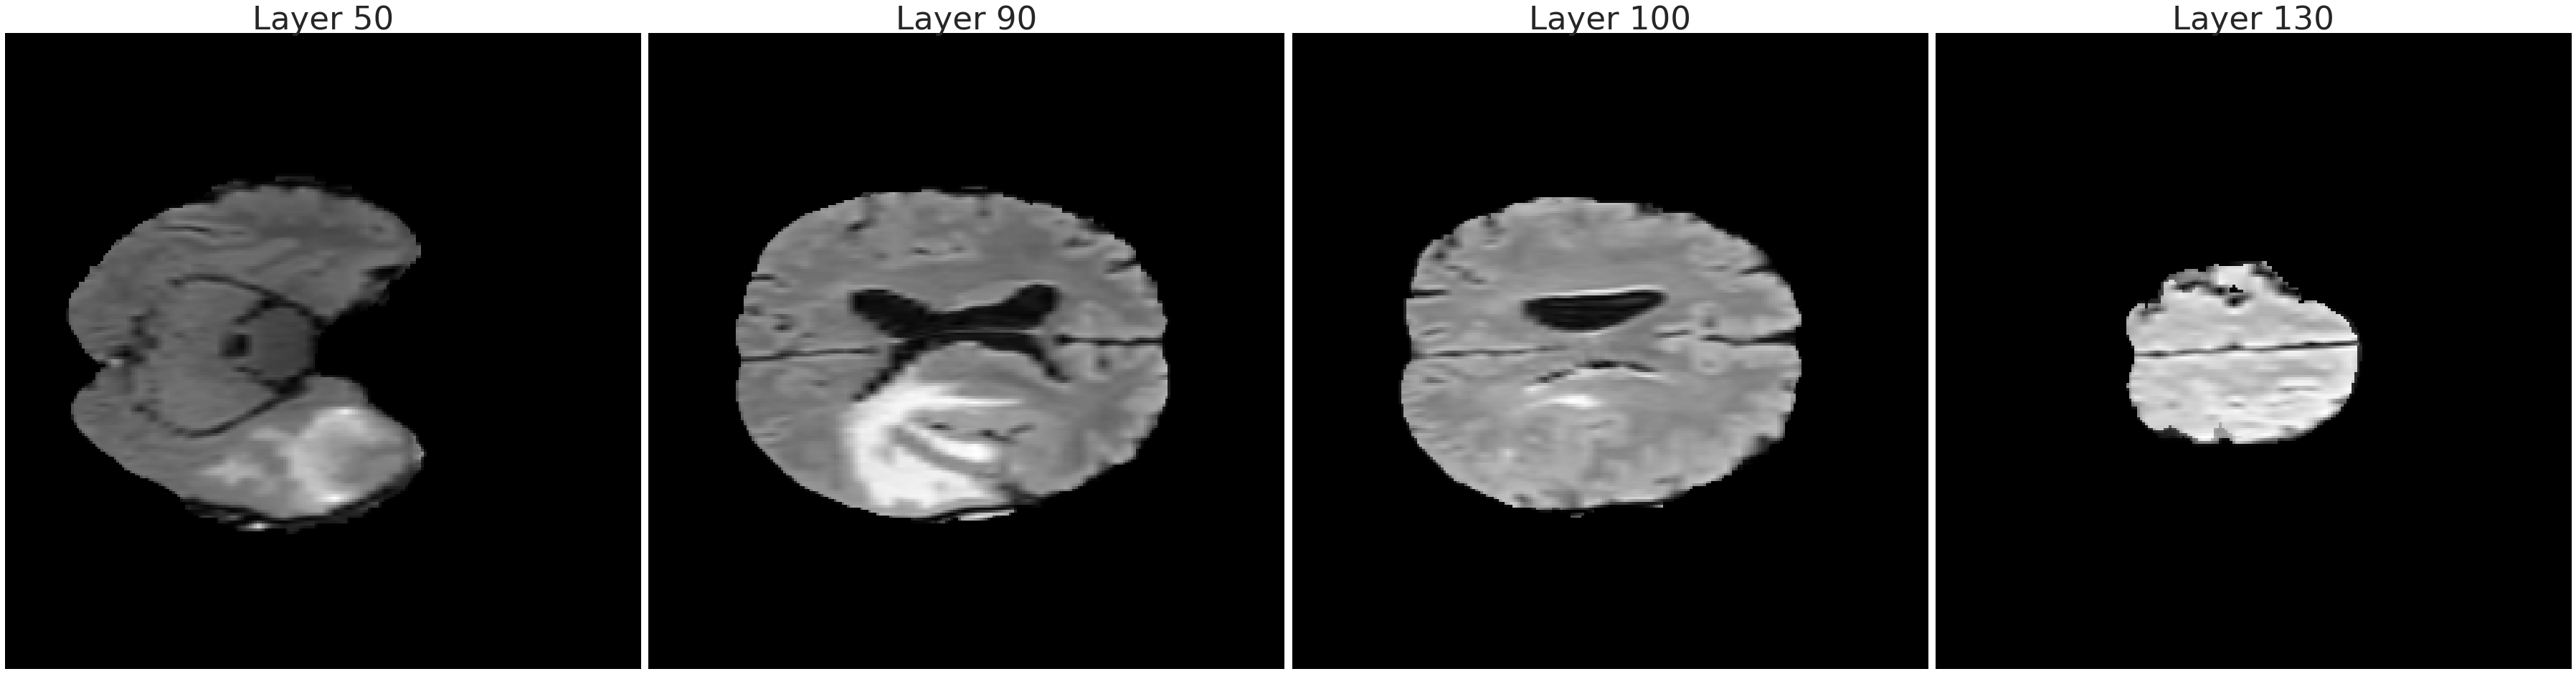

In [26]:
layer = [50, 90, 100, 130]

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    ax[i].imshow(image_data[:, :, layer[i], 0], cmap='gray')
    ax[i].set_title(f"Layer {layer[i]}", fontsize=45)
    ax[i].axis('off')

plt.axis('off')
plt.tight_layout()

## Load labels for the same MRI data

In [28]:
# Define the data path and load the data
label_path = "./data/labels/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [32]:
# Extract data labels
label_array = label_obj.get_fdata()
# print(label_array)
type(label_array)

numpy.ndarray

In [30]:
# Extract and print out the shape of the labels data
height, width, depth = label_array.shape
print(f"Dimensions of labels data array height: {height}, width: {width}, depth: {depth}")
print(f'With the unique values: {np.unique(label_array)}')
print("""Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")

Dimensions of labels data array height: 240, width: 240, depth: 155
With the unique values: [0. 1. 2. 3.]
Corresponding to the following label categories: 
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


## Visualize single layer with corresponding labels

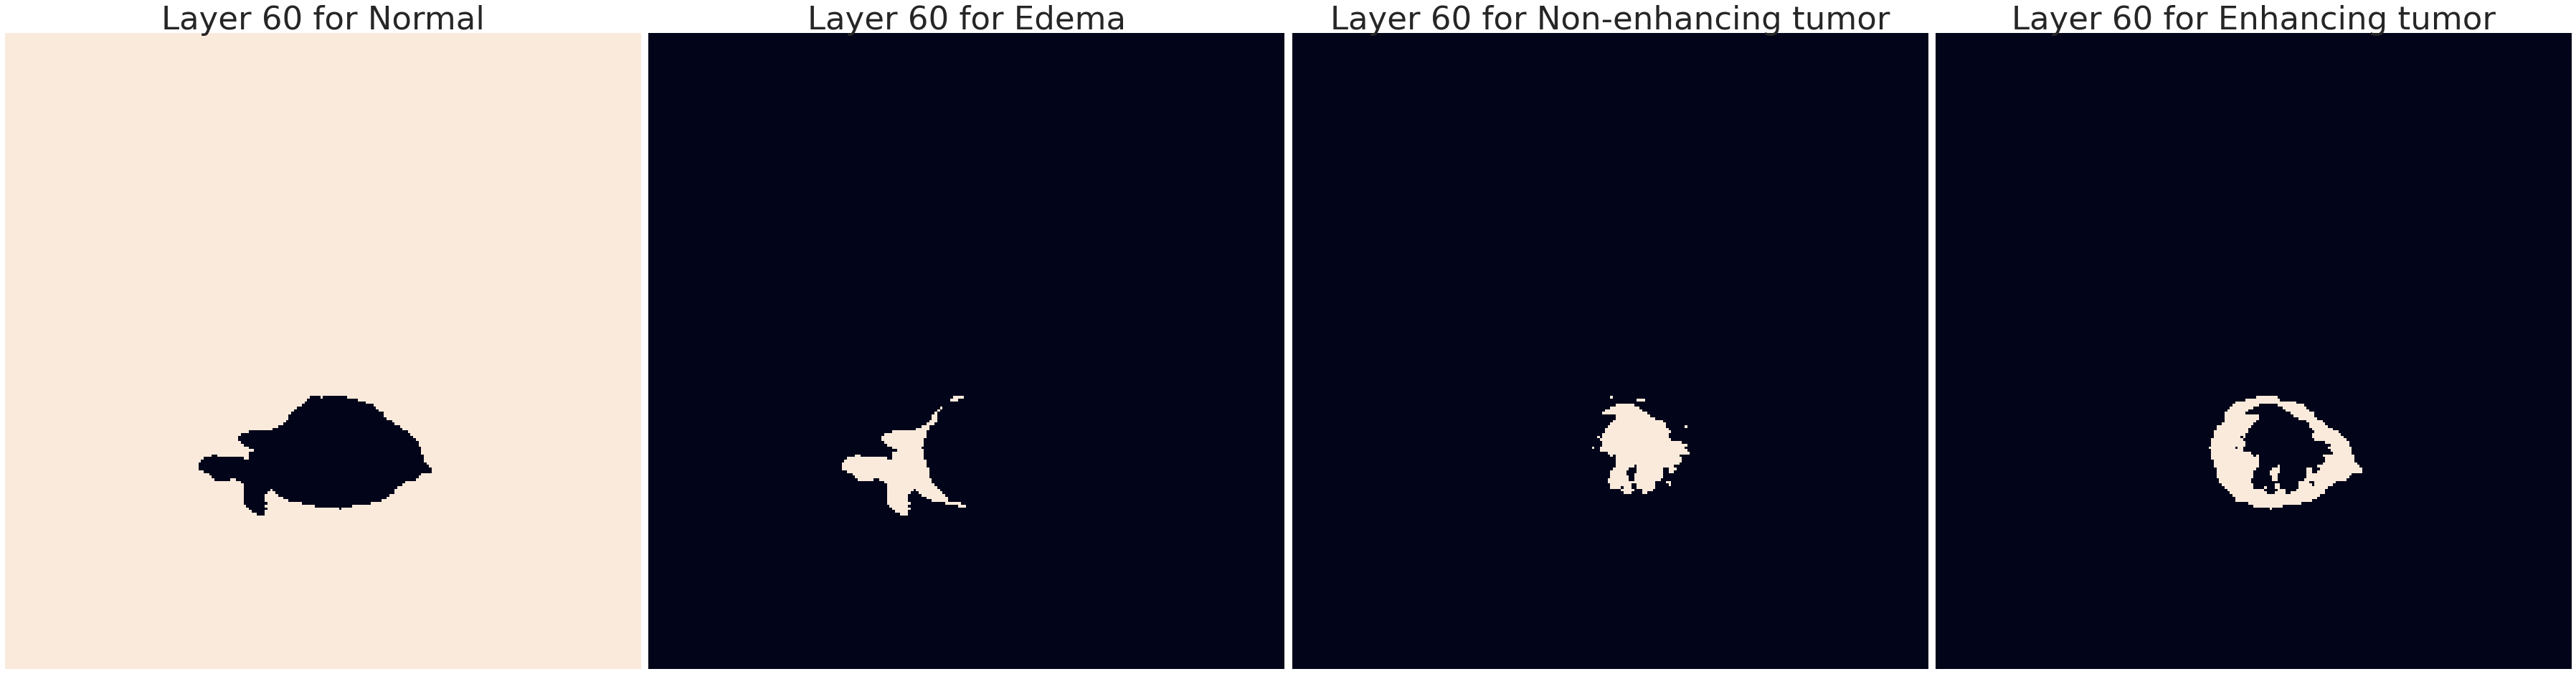

In [33]:
# Define a single layer for plotting
layer = 60

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    mask = np.where(img == classes_dict[img_label_str], 255, 0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer {layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

## Combine the 4 binary masks into a single 4-color segmented image

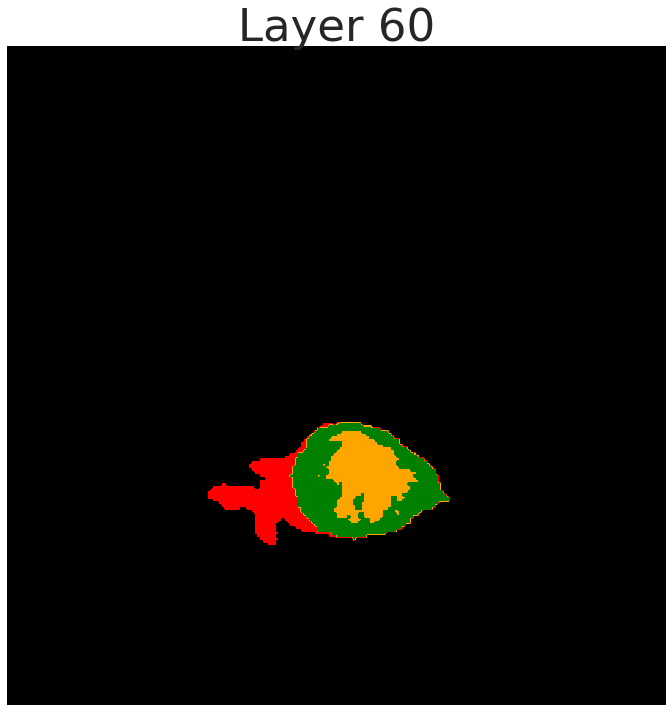

In [34]:
# Define a single layer for plotting
layer = 60

# Define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3. 
}

# Set up for plotting
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
from matplotlib.colors import ListedColormap
# Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
col_dict={
    0: "black",
    1: "red",
    2: "orange",
    3: "green"
}
# We create a colormar from our list of colors
cmap = ListedColormap([col_dict[x] for x in col_dict.keys()])

# isolate labels for chosen layer
layer_labels = label_array[:,:,layer]

# plot image
im = ax.imshow(layer_labels, cmap=cmap)
ax.set_title(f"Layer {layer}", fontsize=45)
ax.axis('off')
plt.tight_layout()

## Visualize 4-color segmented image over multiple layers 

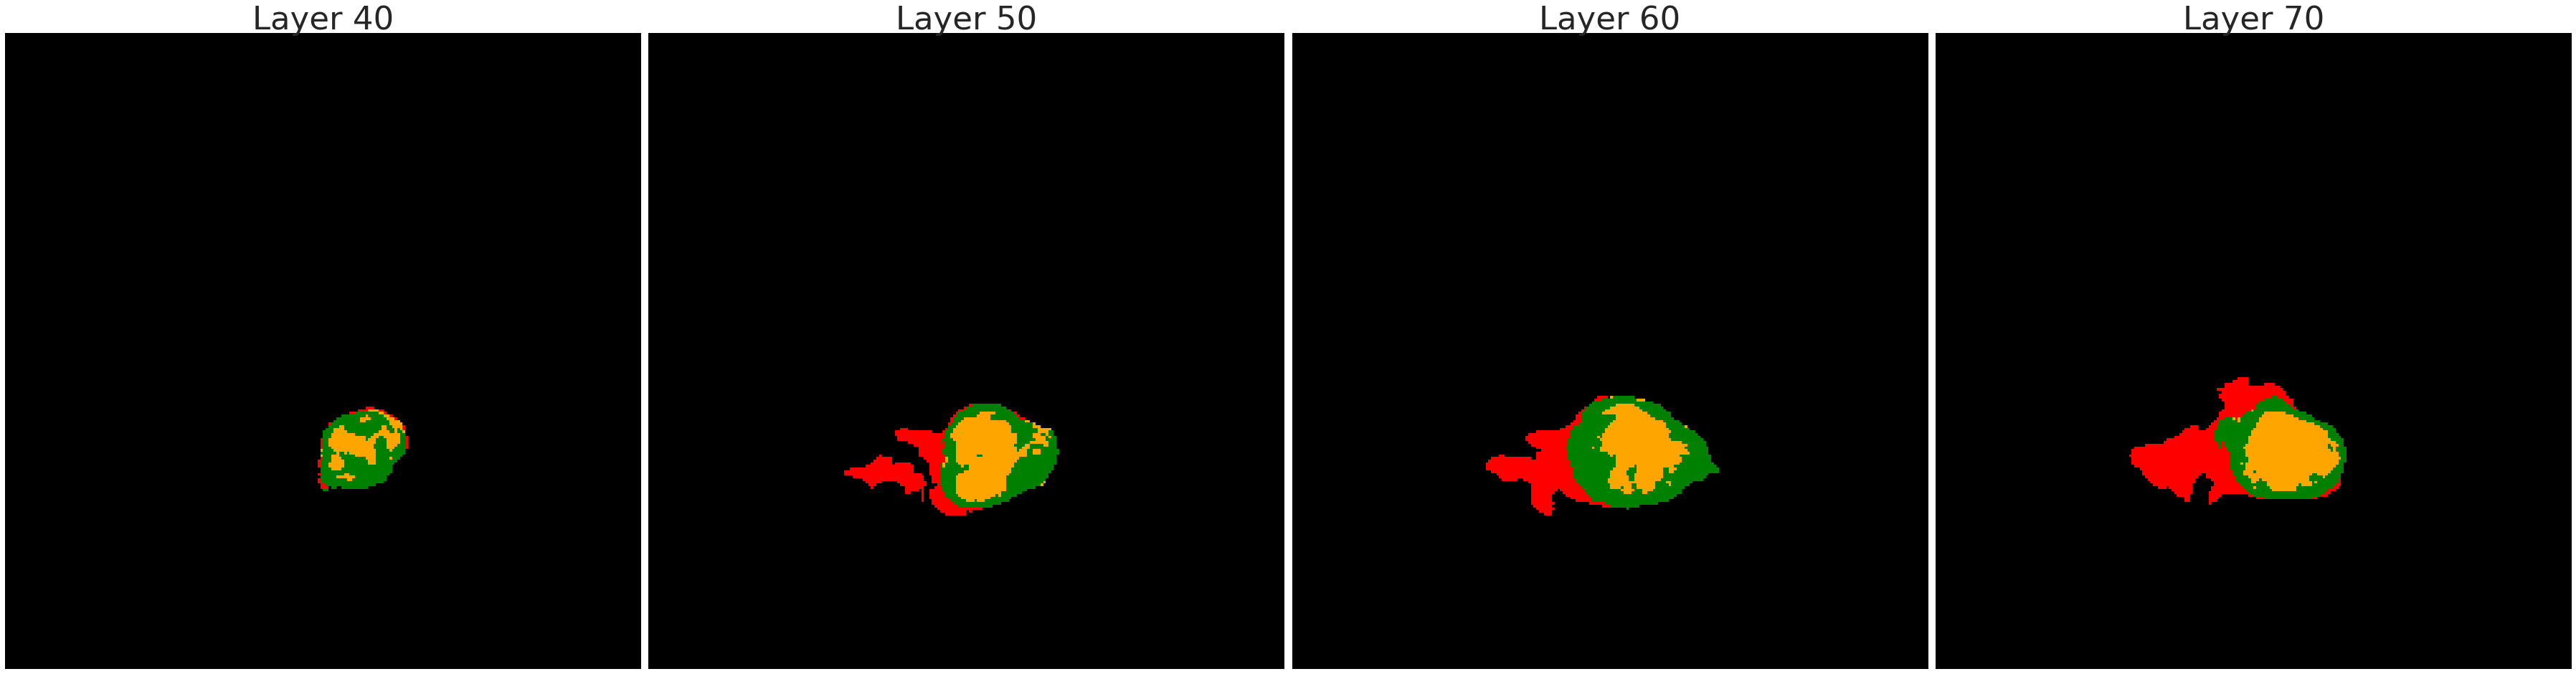

In [43]:
layer = [40, 50, 60, 70]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))

cmap = ListedColormap([col_dict[x] for x in col_dict.keys()])


# write code here to make a 1x4 panel plot
for i in range(4):
    # img_label_str = list(classes_dict.keys())[i]
    # img = label_array[:,:,layer[i]]        
    layer_labels = label_array[:,:,layer[i]]
    
    im = ax[i].imshow(layer_labels, cmap=cmap)
    ax[i].set_title(f"Layer {layer[i]}", fontsize=45)
    ax[i].axis('off')
    plt.tight_layout()
    
plt.tight_layout()